Oliver W. Layton

Fall 2019

CS343: Neural Networks

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Tensorflow 2.0 tutorial

It is important that you have Tensorflow 2.0 installed (final version released this month). The older version 1.X will NOT work for this class and is completely incompatible.

You can install it on your laptop via pip: `pip3 install tensorflow`.

*Not at all necessary: If you have a powerful (CUDA-compatible) GPU on your computer, run Windows 10/Linux, and want to bother with the time-consuming process for installing the GPU-optimized version of Tensorflow, see http://cs.colby.edu/courses/F19/cs343/software.html#gpuInstall. Note that there are no "bonus points" for doing this. If you're unsure whether your GPU supports CUDA, check out https://developer.nvidia.com/cuda-gpus.*

**Tip:** The Davis iMacs have an optimized version of Tensorflow 2.0 installed on them. If you want more speed, but don't want to bother with the GPU version, try working on a lab iMac.

The following should print:

    Tensorflow version 2.0.0

In [2]:
import tensorflow as tf

print('Tensorflow version', tf.__version__)

Tensorflow version 2.0.0


#### Tensorflow 2.0 API

**Super, super helpful reference:** https://www.tensorflow.org/api_docs/python

#### WARNING

Most non-tensorflow.org code/references online/textbooks is still tensorflow 1.X. Be careful to not get confused with incompatibility.

## Tensorflow's Tensor datatype

Let's go over how to create a tensor and perform some common operations.

### Creating a tensor

In [3]:
# zeros
tf.zeros(shape=(2,3))

<tf.Tensor: id=2, shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [4]:
# ones
tf.ones(shape=(4,4))

<tf.Tensor: id=5, shape=(4, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [5]:
# random: gaussian
tf.random.normal(shape=(3,3), mean=2, stddev=1)

<tf.Tensor: id=11, shape=(3, 3), dtype=float32, numpy=
array([[1.596, 1.758, 1.336],
       [2.582, 2.71 , 2.057],
       [1.093, 1.437, 0.781]], dtype=float32)>

In [6]:
# random: uniform float. Specify minval/maxval
tf.random.uniform(shape=(5,5), minval=-5, maxval=10)

<tf.Tensor: id=18, shape=(5, 5), dtype=float32, numpy=
array([[-0.507,  7.915,  2.895,  8.95 , -2.004],
       [ 5.018, -3.939,  3.882,  1.344,  6.   ],
       [-4.624,  0.913,  5.777,  0.51 , -1.939],
       [ 1.242,  5.176,  8.383, -4.133,  1.41 ],
       [-3.208,  2.096, -1.416,  9.737,  5.322]], dtype=float32)>

In [7]:
# random: uniform int
tf.random.uniform(shape=(5,5), minval=-5, maxval=10, dtype=tf.int32)

<tf.Tensor: id=22, shape=(5, 5), dtype=int32, numpy=
array([[ 6,  7,  0,  7,  7],
       [-4,  8, -4, -5,  3],
       [-4,  2,  0, -1,  3],
       [ 3,  2, -1,  4,  2],
       [ 6, -1,  2,  9,  5]], dtype=int32)>

In [8]:
# Creating a tf tensor based on a int/float
tf.Variable(5.5)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.5>

In [9]:
# Creating a tf tensor based on a python list
tf.Variable([1,2,3])

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [11]:
# create tensor from numpy ndarray
import numpy as np
np_arr = np.random.randn(3,4,5)
print(np_arr)
tf_tens = tf.Variable(np_arr)
print(tf_tens)

[[[ 1.717  0.592  0.675  0.849  1.209]
  [-0.382 -0.847  2.425 -0.45   1.577]
  [-1.183  2.095 -0.88  -0.766  0.894]
  [-0.635  1.015  1.099  0.107 -0.568]]

 [[ 1.627 -2.283  0.992  1.486  1.136]
  [-1.529 -0.478 -1.139 -0.462 -1.818]
  [-0.095 -0.524 -0.39  -0.58   0.615]
  [-1.106  1.355  0.367 -1.705  1.269]]

 [[ 2.925 -0.947  0.371  0.321 -0.291]
  [-2.875 -0.842  1.814  0.316 -1.335]
  [-0.19  -1.173 -0.162  0.447 -0.528]
  [-0.578  0.83   0.411 -0.729 -3.052]]]
<tf.Variable 'Variable:0' shape=(3, 4, 5) dtype=float64, numpy=
array([[[ 1.717,  0.592,  0.675,  0.849,  1.209],
        [-0.382, -0.847,  2.425, -0.45 ,  1.577],
        [-1.183,  2.095, -0.88 , -0.766,  0.894],
        [-0.635,  1.015,  1.099,  0.107, -0.568]],

       [[ 1.627, -2.283,  0.992,  1.486,  1.136],
        [-1.529, -0.478, -1.139, -0.462, -1.818],
        [-0.095, -0.524, -0.39 , -0.58 ,  0.615],
        [-1.106,  1.355,  0.367, -1.705,  1.269]],

       [[ 2.925, -0.947,  0.371,  0.321, -0.291],
        

### Basic operations

In [12]:
# printing
tf.print(tf_tens)

[[[1.716982672011512 0.592252359713123 0.675392489973696 0.84892907149549668 1.2085944662495938]
  [-0.38163424109075272 -0.846597396262694 2.4247887629323186 -0.45022561471420069 1.5772470549886455]
  [-1.1826335900343776 2.0949275183040745 -0.88048577489698332 -0.76564193553605919 0.89364127009816618]
  [-0.63507023252666706 1.0149015023012413 1.0990228340498847 0.10655041544043668 -0.56764541845505534]]

 [[1.6269754838616082 -2.2826859193143529 0.991551120002067 1.4864472734836987 1.1360377864744735]
  [-1.5291642796396137 -0.47831966320678571 -1.1389850266748383 -0.46156031484037158 -1.8175066161855506]
  [-0.094784208089307181 -0.52411809453608182 -0.3902868724841887 -0.58041737618872724 0.6148911497606484]
  [-1.1063852736985655 1.3554663715024449 0.36660393932952917 -1.7053422479377913 1.2689370885080677]]

 [[2.9253882701004632 -0.94700928727424594 0.370868125508611 0.320558238252383 -0.29059358203505]
  [-2.874601478867286 -0.84243793802896749 1.8143976582138426 0.31644015049

In [13]:
# converting a tf tensor to a numpy array
converted_np_arr = tf_tens.numpy()
converted_np_arr

array([[[ 1.717,  0.592,  0.675,  0.849,  1.209],
        [-0.382, -0.847,  2.425, -0.45 ,  1.577],
        [-1.183,  2.095, -0.88 , -0.766,  0.894],
        [-0.635,  1.015,  1.099,  0.107, -0.568]],

       [[ 1.627, -2.283,  0.992,  1.486,  1.136],
        [-1.529, -0.478, -1.139, -0.462, -1.818],
        [-0.095, -0.524, -0.39 , -0.58 ,  0.615],
        [-1.106,  1.355,  0.367, -1.705,  1.269]],

       [[ 2.925, -0.947,  0.371,  0.321, -0.291],
        [-2.875, -0.842,  1.814,  0.316, -1.335],
        [-0.19 , -1.173, -0.162,  0.447, -0.528],
        [-0.578,  0.83 ,  0.411, -0.729, -3.052]]])

In [14]:
# generate range
r = tf.range(5)
r

<tf.Tensor: id=54, shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

In [18]:
# arithmetic: adding, subtracting, multiplication/division
r = r + 1
print(r)
r = r - 1
print(r)
r = 2*r
print(r)
r = r/2
print(r)

tf.Tensor([ 3  5  7  9 11], shape=(5,), dtype=int32)
tf.Tensor([ 2  4  6  8 10], shape=(5,), dtype=int32)
tf.Tensor([ 4  8 12 16 20], shape=(5,), dtype=int32)
tf.Tensor([ 2.  4.  6.  8. 10.], shape=(5,), dtype=float64)


#### Assignment

In [20]:
# You slice like python
r[:2]

<tf.Tensor: id=80, shape=(2,), dtype=float64, numpy=array([2., 4.])>

In [21]:
# but you cannot do assignment like python. crash:
r[0] = 100
# Avoid assigning parts of a tensor...it's a headache

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [22]:
# assignment hack: use tf.where. e.g. replace the value 0 with 100 in a tensor
r = tf.where(r == 2., 100, r)
r

<tf.Tensor: id=84, shape=(5,), dtype=float64, numpy=array([100.,   4.,   6.,   8.,  10.])>

#### Selecting values by indices

Slicing works like numpy — but what if you want to index into non-contiguous indices? e.g. at index 3 and 5 for axis=2?

Example: 
Original tensor shape=(3,4,**6**,7)

Goal (after indexing): shape=(3,4,**2**,7)

(if this were 2D, like selecting all rows, but only 2 columns)

In [24]:
tf.random.set_seed(0)
test = tf.random.normal(shape=(3,4,6,7))
tf.print(test.shape)
tf.print(tf.gather(test, [3, 5], axis=2).shape)

TensorShape([3, 4, 6, 7])
TensorShape([3, 4, 2, 7])


Slightly different problem: Select a (non-contiguous) list of individual elements from a tensor.

Specify by a list of subscript indices (e.g. [0,0,0] to access top left element of a 3D tensor).

In [26]:
# test has shape=(2,2,2)
test = tf.Variable([[[10, 11], [12, 13]], [[99, 100], [101, 102]]])
tf.print(test)
tf.print(test.shape)
tf.print(tf.gather_nd(test, [[0, 0, 0], [1,1,1]]))

[[[10 11]
  [12 13]]

 [[99 100]
  [101 102]]]
TensorShape([2, 2, 2])
[10 102]


#### Memory

In [30]:
# noteworthy memory point so you're aware:
# Taking a tensor and modifying it via arithmetic creates a NEW tensor in memory
test = test + 1
test

<tf.Tensor: id=134, shape=(2, 2, 2), dtype=int32, numpy=
array([[[ 12,  13],
        [ 14,  15]],

       [[101, 102],
        [103, 104]]], dtype=int32)>

#### Checking shapes

In [31]:
# Checking shapes
test.shape

TensorShape([2, 2, 2])

In [32]:
# can slice TensorShape objects as you'd expect
test.shape[:2]

TensorShape([2, 2])

In [33]:
# use as_list() method to get a python list of shape back
test.shape.as_list()

[2, 2, 2]

### Useful operations for neural networks

#### Reduce

In [36]:
# often you have a multi-dimensional tensor and want to sum up all elements into a single
# scalar value (reduce)
t = tf.ones(shape=(5, 5, 5))
tf.reduce_sum(t)

<tf.Tensor: id=147, shape=(), dtype=float32, numpy=125.0>

In [37]:
# can do mean, max, min, etc
t_ran = tf.random.normal(shape=(5, 5, 5))
tf.print('mean', tf.reduce_mean(t_ran))
tf.print('min', tf.reduce_min(t_ran))
tf.print('max', tf.reduce_max(t_ran))

mean 0.0514610335
min -2.76179099
max 3.11799765


In [38]:
# Each reduce command supports an axis like numpy
ran = tf.random.normal(shape=(3,4,5))
tf.reduce_mean(ran, axis=1)

<tf.Tensor: id=170, shape=(3, 5), dtype=float32, numpy=
array([[-0.583, -0.663, -0.569,  0.279,  0.12 ],
       [ 0.196,  0.258, -0.529, -0.256, -0.309],
       [-0.327,  0.285,  0.529,  0.223, -0.062]], dtype=float32)>

#### clip values outside a range

In [40]:
ran

<tf.Tensor: id=168, shape=(3, 4, 5), dtype=float32, numpy=
array([[[-1.804, -0.112, -0.846,  0.849,  0.122],
        [ 1.335,  0.62 , -0.55 , -0.608,  0.847],
        [-0.561, -1.933,  0.022,  0.85 , -0.568],
        [-1.303, -1.227, -0.902,  0.027,  0.077]],

       [[ 0.478, -0.053, -1.276, -0.104,  1.88 ],
        [ 0.115, -0.025,  0.231,  0.188, -2.554],
        [-0.342,  1.116, -0.412, -0.32 , -0.778],
        [ 0.531, -0.005, -0.658, -0.787,  0.217]],

       [[ 0.327,  0.706,  1.621, -0.891,  0.043],
        [-0.026, -0.047, -0.974, -0.72 , -0.549],
        [-0.917, -0.062,  0.38 ,  0.307,  0.86 ],
        [-0.692,  0.542,  1.089,  2.197, -0.603]]], dtype=float32)>

In [39]:
tf.clip_by_value(ran, -0.3, 0.3)

<tf.Tensor: id=174, shape=(3, 4, 5), dtype=float32, numpy=
array([[[-0.3  , -0.112, -0.3  ,  0.3  ,  0.122],
        [ 0.3  ,  0.3  , -0.3  , -0.3  ,  0.3  ],
        [-0.3  , -0.3  ,  0.022,  0.3  , -0.3  ],
        [-0.3  , -0.3  , -0.3  ,  0.027,  0.077]],

       [[ 0.3  , -0.053, -0.3  , -0.104,  0.3  ],
        [ 0.115, -0.025,  0.231,  0.188, -0.3  ],
        [-0.3  ,  0.3  , -0.3  , -0.3  , -0.3  ],
        [ 0.3  , -0.005, -0.3  , -0.3  ,  0.217]],

       [[ 0.3  ,  0.3  ,  0.3  , -0.3  ,  0.043],
        [-0.026, -0.047, -0.3  , -0.3  , -0.3  ],
        [-0.3  , -0.062,  0.3  ,  0.3  ,  0.3  ],
        [-0.3  ,  0.3  ,  0.3  ,  0.3  , -0.3  ]]], dtype=float32)>

#### Adding a singleton (batch) dimension

In [42]:
ran = tf.expand_dims(ran, axis=0)
tf.print(ran.shape)

TensorShape([1, 3, 4, 5])


#### squeeze

In [43]:
# squeeze works too
ran = tf.squeeze(ran)
tf.print(ran.shape)

TensorShape([3, 4, 5])


## Building a neural network with Tensorflow's low-level API

Let's build a MLP with the low-level Tensorflow API and do a forward pass.
Let's have the following layers:

    Dense netIn / ReLu netAct ->
    Dense netIn / Sigmoid netAct ->
    Dense netIn / Softmax netAct (input has C classes)

MLP, forward, loss, gradient tape

### Dummy image input

**TODO**:
- For input, let's make some random images.
- For classes `y`, let's pick random numbers from `C=10` classes

**NOTE:** One oddity is that Tensorflow likes the color channel in this format `(img_y, img_x, n_chans)`. We of course have been using `(n_chans, img_y, img_x)`, which is the convention for other neural network APIs (e.g. PyTorch and others). There is no "right" way: we just need to remember to be flexible in our ways :)

In [3]:
N = 20
img_y = 32
img_x = 32
n_chans = 3
C = 10

# gaussian inputs
inputs = tf.random.normal(shape=(N, img_y, img_x, n_chans))
# classes need to be Nx1 for broadcast-ability later on
y = tf.random.uniform(shape=(N,1), maxval=C, dtype=tf.int32)
print(f'Inputs have shape {inputs.shape}')
print(f'Class assignments:\n{y}')

Inputs have shape (20, 32, 32, 3)
Class assignments:
[[2]
 [8]
 [8]
 [3]
 [7]
 [0]
 [3]
 [2]
 [3]
 [8]
 [5]
 [0]
 [2]
 [3]
 [8]
 [7]
 [1]
 [9]
 [0]
 [8]]


### Flatten non-batch dims

Like any MLP, we can only pass in 1D non-batch features. We need to flatten non-batch dims. Let's write a simple function to do this

In [4]:
def flatten(x):
    '''Flattens non-batch dims of input
    
    Parameters:
    -----------
    x: tf tensor. shape=(N, dim1, dim2, dim3, ...)
    
    Returns:
    -----------
    xf: tf tensor. shape=(N, dim1*dim2*dim3*...)
    '''
    return tf.reshape(x, [x.shape[0], -1])

In [5]:
# Define 'features' to be flattened inputs
features = flatten(inputs)
print(flatten(inputs).shape)

(20, 3072)


In [6]:
# for convenience, define variable for num_features
num_features = features.shape[1]
num_features

3072

### Define hyperparameters for network architecture

In [7]:
H1 = 10# num hidden units in L1 (1st hidden layer)
H2 = 30# num hidden units in L2 (2nd hidden layer)

### Define wts and bias for each layer

3 sets of Gaussian random wts and bias for `l1`, `l2` and `l3` (output layer)

In [8]:
l1_wts = tf.Variable(tf.random.normal(shape=(num_features, H1)))
l1_b = tf.Variable(tf.random.normal(shape=(H1,)))
l2_wts = tf.Variable(tf.random.normal(shape=(H1, H2)))
l2_b = tf.Variable(tf.random.normal(shape=(H2,)))
l3_wts = tf.Variable(tf.random.normal(shape=(H2, C)))
l3_b = tf.Variable(tf.random.normal(shape=(C,)))

### Do forward pass, compute loss

Notes:
- Remember, `Dense` is just a dot product (aka matrix multiply)
- `tf.nn` has lots of activation functions

In [9]:
# Layer 1: Dense netIn
l1_net_in = tf.matmul(features, l1_wts) + l1_b
# Layer 1: ReLU
l1_net_act = tf.nn.relu(l1_net_in)
# Layer 2: Dense netIn
l2_net_in = tf.matmul(l1_net_act, l2_wts) + l2_b
# Layer 2: Sigmoid
l2_net_act = tf.nn.sigmoid(l2_net_in)
# Layer 3: Dense netIn
l3_net_in = tf.matmul(l2_net_act, l3_wts) + l3_b
# Layer 3: Softmax
l3_net_act = tf.nn.softmax(l3_net_in)

In [10]:
# probs that input 0 is of the 10 classes
tf.print(l3_net_act[0])

[0.0856926367 0.00102116435 0.000880878128 ... 9.12787527e-07 0.0247433502 0.125046819]


**NOTE:**

- The common cross-entopy function in Tensorflow (`tf.nn.softmax_cross_entropy_with_logits(y, out_netIn)`) does the softmax calculation AND the cross-entropy calculation together. Therefore, we should pass it the outlayer layer NET_IN values, NOT the NET_ACT values (we could just not compute the NET_ACT ourselves).
- This tensorflow loss function returns the loss PER SAMPLE. We need to average them across the batch ourselves

In [11]:
# compute softmax and cross-entropy loss
loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
print(loss)
loss = tf.reduce_mean(loss)
tf.print(loss)

tf.Tensor(
[103.093 431.672 387.082 144.586 284.938   0.    130.67  143.257 154.605
 495.028 307.674   0.     90.991 148.026 486.386 573.048 102.563 486.338
   0.    410.464], shape=(20,), dtype=float32)
244.021042


### Full forward and backward pass

#### Let's copy-paste forward code (minus output netAct) into the following function

In [14]:
def forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b):
    # Layer 1: Dense netIn
    l1_net_in = tf.matmul(features, l1_wts) + l1_b
    # Layer 1: ReLU
    l1_net_act = tf.nn.relu(l1_net_in)
    # Layer 2: Dense netIn
    l2_net_in = tf.matmul(l1_net_act, l2_wts) + l2_b
    # Layer 2: Sigmoid
    l2_net_act = tf.nn.sigmoid(l2_net_in)
    # Layer 3: Dense netIn
    l3_net_in = tf.matmul(l2_net_act, l3_wts) + l3_b
    return l3_net_in

#### Backward pass

**SURPRISE:** Tensorflow computes the gradients automatically for us if we compute the forward pass while in 'gradient recording mode' (`GradientTape` block). 

This magic is called **reverse-mode automatic differentiation**:
- Tensorflow creates a graph of all weight/bias variables (like the network diagrams we often draw in class).
- As you compute forward pass, it records which operations/functions affect nodes in the graph.
- When it's done, it does backprop (similar to how we learned it): `d_upstream` * `partial derivative of current node in graph` to move to that node in the graph.

**Caveat:** To make a node in the graph, tensorflow needs a `tf.Variable`. This is why we needed to wrap the wts/bias in `tf.Variable`.

**TODO**
- Do forward pass, compute loss in a `GradientTape` session, get all the gradients

In [15]:
with tf.GradientTape() as tape:
    l3_net_in = forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b)
    loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
    loss = tf.reduce_mean(loss)
# get grads
all_wts = [l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b]
grads = tape.gradient(loss, all_wts)

In [18]:
# e.g. check shape of l1_wts and d_l1_wts
tf.print(grads[0].shape)
tf.print(l1_wts.shape)
tf.print(grads[0][:5])

TensorShape([3072, 10])
TensorShape([3072, 10])
[[-0.0220893919 -0.0461079106 0.025971109 ... 0.0334777832 -0.0418410636 -0.0398202576]
 [-0.0126873516 0.0450099818 0.0274855681 ... 0.0413234457 0.115166731 0.0165327303]
 [0.0485153 -0.0242126957 -0.00159070466 ... -0.0574413575 -0.0345124789 -0.0260113813]
 [-0.0424565822 -0.0159675758 -0.00129513792 ... 0.0543132797 -0.0614299178 0.0424198061]
 [-0.0464476831 0.0738455579 0.00354415714 ... 0.0501795225 0.0714573488 0.0131895887]]


##### Trick: Calling gradient more than once

Notice above how we computed all the wt/bias gradients at once in a list. This was intentional. The `GradientTape` only stores gradients in memory for one call of `tape.gradient`: afterwards, the tape goes blank

In [19]:
with tf.GradientTape() as tape:
    l3_net_in = forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b)
    loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
    loss = tf.reduce_mean(loss)
# get grads
# all_wts = [l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b]
d_l1_wts = tape.gradient(loss, l1_wts)
d_l2_wts = tape.gradient(loss, l2_wts)
# Call gradient more than once -> crash


RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

Fix: use `persistent=True` optional parameter.

This makes the gradients stay in memory until `tape` is garbage collected. Good idea in cases like this where `tape` is GCed only when notebook closed to use Python `del` operator to delete when we're done

In [23]:
with tf.GradientTape(persistent=True) as tape:
    l3_net_in = forward(features, l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b)
    loss = tf.nn.softmax_cross_entropy_with_logits(y, l3_net_in)
    loss = tf.reduce_mean(loss)
# get grads
# all_wts = [l1_wts, l1_b, l2_wts, l2_b, l3_wts, l3_b]
d_l1_wts = tape.gradient(loss, l1_wts)
d_l2_wts = tape.gradient(loss, l2_wts)
print(d_l1_wts.shape)
print(d_l2_wts.shape)

del tape

(3072, 10)
(10, 30)


In [24]:
tape

NameError: name 'tape' is not defined

##### Update wts using gradients

- Re-execute original backward pass cell.
- Loop thru wts/bias and corresponding gradients, update the weights via gradient descent.


**NOTE about -=:** 
- Does't exist in tensorflow.
- `thing = thing - d_thing` doesn't mutate (change) `thing` it copies everything over as a new object in memory. This is wasteful.
- If `thing` is a `tf.Variable`, we can update its value via `thing.assign_sub(d_thing)` (-=). ("sub" for subtract. There is a `assign_add` for addition).

In [26]:
l1_wts[0]

<tf.Tensor: id=794, shape=(10,), dtype=float32, numpy=
array([ 1.377, -0.103, -0.226,  0.648,  0.816,  0.573,  0.092, -0.568,
        1.043, -0.849], dtype=float32)>

In [29]:
for wts, d_wts in zip(all_wts, grads):
    wts.assign_sub(d_wts)

# wts = wts - 0.1*d_wts

In [30]:
l1_wts[0]

<tf.Tensor: id=816, shape=(10,), dtype=float32, numpy=
array([ 1.401, -0.053, -0.255,  0.391,  0.927,  0.58 ,  0.071, -0.605,
        1.089, -0.805], dtype=float32)>

**NOTE:**
- If doing conv2d early in the network, remember to use 'SAME' boundary conditions and to flatten non-batch dims before entering `Dense` layers (like in Project 3).

## Tensorflow's high level Keras Sequential API


**Pros of low-level API:**
- Numpy-like flexibility with designing your network, with library access to common netAct/loss functions.
- Can implement whatever layer/net connectivity and training protocol/bells/whistles that you like

**Cons of low-level API:**
- Even though netIn/netAct calculations are relatively easy to implement as the programmer, you still need to write lots of boilerplate code every time (e.g. initialize wt/bias tensors, record gradients/unpack them, write main training loop, etc.). 

###  `Keras::Sequential` API

- Very high level.
- Allows you to configure common network layers with netIn/netAct in very few lines of code.
- Abstracts away wt/bias initializtion, performance metric calculation, training loop, etc.
- Useful for prototyping/trying different network architectures to solve a problem without investing time to implement lots of code specific to each netIn/netAct/num layers.

The following functions are commonly used in the Keras Sequential API:

- https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
- https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary

### Implementing MLP in `Keras::Sequential` 

    Dense netIn / ReLu netAct ->
    Dense netIn / Sigmoid netAct ->
    Dense netIn / Softmax netAct (input has C classes)

#### Set up inputs once again

Let's also define a random test and validation set

In [31]:
N = 20
img_y = 32
img_x = 32
n_chans = 3
C = 10

# gaussian inputs
inputs = tf.random.normal(shape=(N, img_y, img_x, n_chans))

# gaussian test inputs
inputs_test = tf.random.normal(shape=(N//2, img_y, img_x, n_chans))

# gaussian validation inputs
inputs_val = tf.random.normal(shape=(N//2, img_y, img_x, n_chans))

# classes need to be Nx1 for broadcast-ability later on
y = tf.random.uniform(shape=(N,1), maxval=C, dtype=tf.int32)
y_test = tf.random.uniform(shape=(N//2,1), maxval=C, dtype=tf.int32)
y_val = tf.random.uniform(shape=(N//2,1), maxval=C, dtype=tf.int32)

print(f'Inputs have shape {inputs.shape}')
print(f'Class assignments:\n{y}')

Inputs have shape (20, 32, 32, 3)
Class assignments:
[[6]
 [1]
 [5]
 [4]
 [2]
 [4]
 [3]
 [6]
 [5]
 [7]
 [3]
 [3]
 [4]
 [0]
 [7]
 [5]
 [7]
 [5]
 [9]
 [0]]


#### Step 1) `Keras::Sequential`  network construction

Idea: Make a sequential list of layer objects.

**NOTES:**
- Need Flatten layer when going from 2D+ input to Dense layer (also needed between Conv/Pooling layers and Dense MLP layers).
- When specifying the `input_shape` in the first layer, do not include batch dimension.
- Easy to check a summary of the network architecture afterwards

In [33]:
H1 = 10# num hidden units in L1 (1st hidden layer)
H2 = 30# num hidden units in L2 (2nd hidden layer)

In [35]:
inputs.shape[1:]

TensorShape([32, 32, 3])

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputs.shape[1:]),
    tf.keras.layers.Dense(units=H1, activation='relu'),
    tf.keras.layers.Dense(units=H2, activation='sigmoid'),
    tf.keras.layers.Dense(units=C, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 31,370
Trainable params: 31,370
Non-trainable params: 0
_________________________________________________________________


#### Step 2) Compile `Keras::Sequential`  network object

Like in the CNN project, `model.compile` allows us to specify the optimizer. For tensorflow, we also specify the loss and the performance metrics we want `Keras` to keep track of for us (remember, we abstract away the training loop, so we can't add calls to compute accuracy/loss when we want).

Lets use:
- Optimizer: adam https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- Loss: cross entropy loss appropriate for int-coded classes ("sparse categorical") (not one-hot coded). https://www.tensorflow.org/api_docs/python/tf/keras/losses
- Metrics: accuracy https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Step 3) Fit model 

Common things to set:
- batch size (4)
- num epochs (50)
- validation data (optional)

In [42]:
hist = model.fit(inputs, y, batch_size=4, epochs=50, validation_data=(inputs_val, y_val), verbose=2)

Train on 20 samples, validate on 10 samples
Epoch 1/50
20/20 - 0s - loss: 0.1023 - accuracy: 1.0000 - val_loss: 3.8136 - val_accuracy: 0.0000e+00
Epoch 2/50
20/20 - 0s - loss: 0.1015 - accuracy: 1.0000 - val_loss: 3.8159 - val_accuracy: 0.0000e+00
Epoch 3/50
20/20 - 0s - loss: 0.1007 - accuracy: 1.0000 - val_loss: 3.8179 - val_accuracy: 0.0000e+00
Epoch 4/50
20/20 - 0s - loss: 0.0999 - accuracy: 1.0000 - val_loss: 3.8209 - val_accuracy: 0.0000e+00
Epoch 5/50
20/20 - 0s - loss: 0.0991 - accuracy: 1.0000 - val_loss: 3.8235 - val_accuracy: 0.0000e+00
Epoch 6/50
20/20 - 0s - loss: 0.0983 - accuracy: 1.0000 - val_loss: 3.8267 - val_accuracy: 0.0000e+00
Epoch 7/50
20/20 - 0s - loss: 0.0975 - accuracy: 1.0000 - val_loss: 3.8287 - val_accuracy: 0.0000e+00
Epoch 8/50
20/20 - 0s - loss: 0.0967 - accuracy: 1.0000 - val_loss: 3.8315 - val_accuracy: 0.0000e+00
Epoch 9/50
20/20 - 0s - loss: 0.0959 - accuracy: 1.0000 - val_loss: 3.8346 - val_accuracy: 0.0000e+00
Epoch 10/50
20/20 - 0s - loss: 0.0951 

Plot training performance metrics using history output. Common metrics:
- loss
- accuracy
- val_accuracy
- val_loss

In [43]:
import matplotlib.pyplot as plt

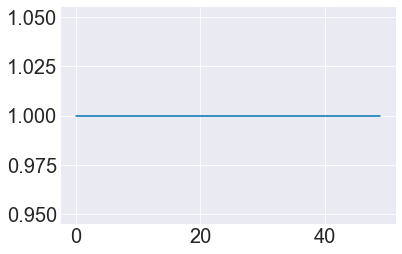

In [44]:
plt.plot(hist.history['accuracy'])
plt.show()

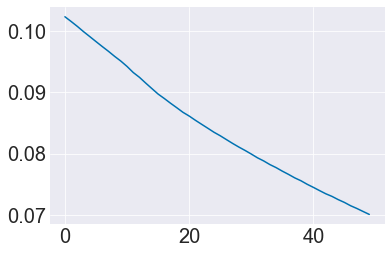

In [45]:
plt.plot(hist.history['loss'])
plt.show()

#### Step 4) Evaluate network on test set

In [46]:
loss, acc = model.evaluate(inputs_test, y_test)
print(f'Test loss {loss} and accuracy {acc}')

10/1 [============================================================================================================================================================================================================================================================================================================] - 0s 204us/sample - loss: 2.7917 - accuracy: 0.2000
Test loss 2.791666030883789 and accuracy 0.20000000298023224


#### Step 5) (optional) Get class probabilities of test input

- `predict()` method

(10, 10)


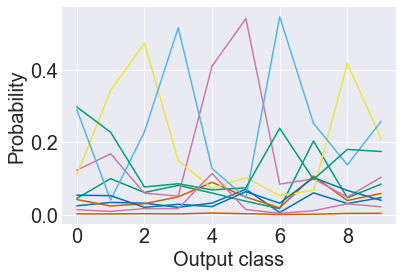

In [47]:
pred = model.predict(inputs_test)
print(pred.shape)
plt.plot(pred)
plt.xlabel('Output class')
plt.ylabel('Probability')
plt.show()

## Transfer learning with pre-trained models

- As you now know first-hand, training a deep neural network can take lots of time! Fortunately, you often don't need to train a large CNN yourself. - Tensorflow makes it easy to download pre-trained `Keras::Sequential` models published by researchers. Here is a list of ones easily downloadable: https://www.tensorflow.org/api_docs/python/tf/keras/applications
- You can download these models and run your data thru them easily. We will use the `MobileNetV2` model here.
- **Problem:** This is fine if you are classifying the same dataset used by the researchers who trained the net...but your problem will usually differ from theirs. You can't expect the network to perform well at handwriting recognition (e.g. MNIST) if the net was trained on outdoor images (e.g. ImageNet). 
- **Solution:** If you have a dataset that is similar to that used in a pre-trained model (e.g. classifying flower types here), we can do something called **transfer learning** to try and repurpose parts of the pre-trained net and make small changes to adapt it to our application.

### Load flower dataset

In [4]:
import load_flower_dataset

In [5]:
flower_x, flower_y, flower_yh, class_names = load_flower_dataset.load()
input_nonbatch_shape = flower_x.shape[1:]
C = len(class_names)

print(f'Flower dataset shape: {flower_x.shape}')
print(f'Flower one-hot coded classes shape: {flower_yh.shape}')
print(f'Flower class names: {class_names}')

Processing roses 641 images
Processing sunflowers 699 images
Processing daisy 633 images
Processing dandelion 898 images
Processing tulips 799 images
Flower dataset shape: (3670, 224, 224, 3)
Flower one-hot coded classes shape: (3670, 5)
Flower class names: ['roses' 'sunflowers' 'daisy' 'dandelion' 'tulips']


### Load in MobileNetV2

Make sure it can't be trained.

In [6]:
model = tf.keras.applications.MobileNetV2(input_shape=input_nonbatch_shape,
                                               weights='imagenet')
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

### Check predicted classes of MobileNetV2 out-of-the-box (oob) and visualize predicted labels next to images

In [7]:
# get model predicted probs, then for each image, find the most active category
oob_prob = model.predict(flower_x[:30])
oob_preds = class_names[flower_y[np.argmax(oob_prob, axis=1)]]

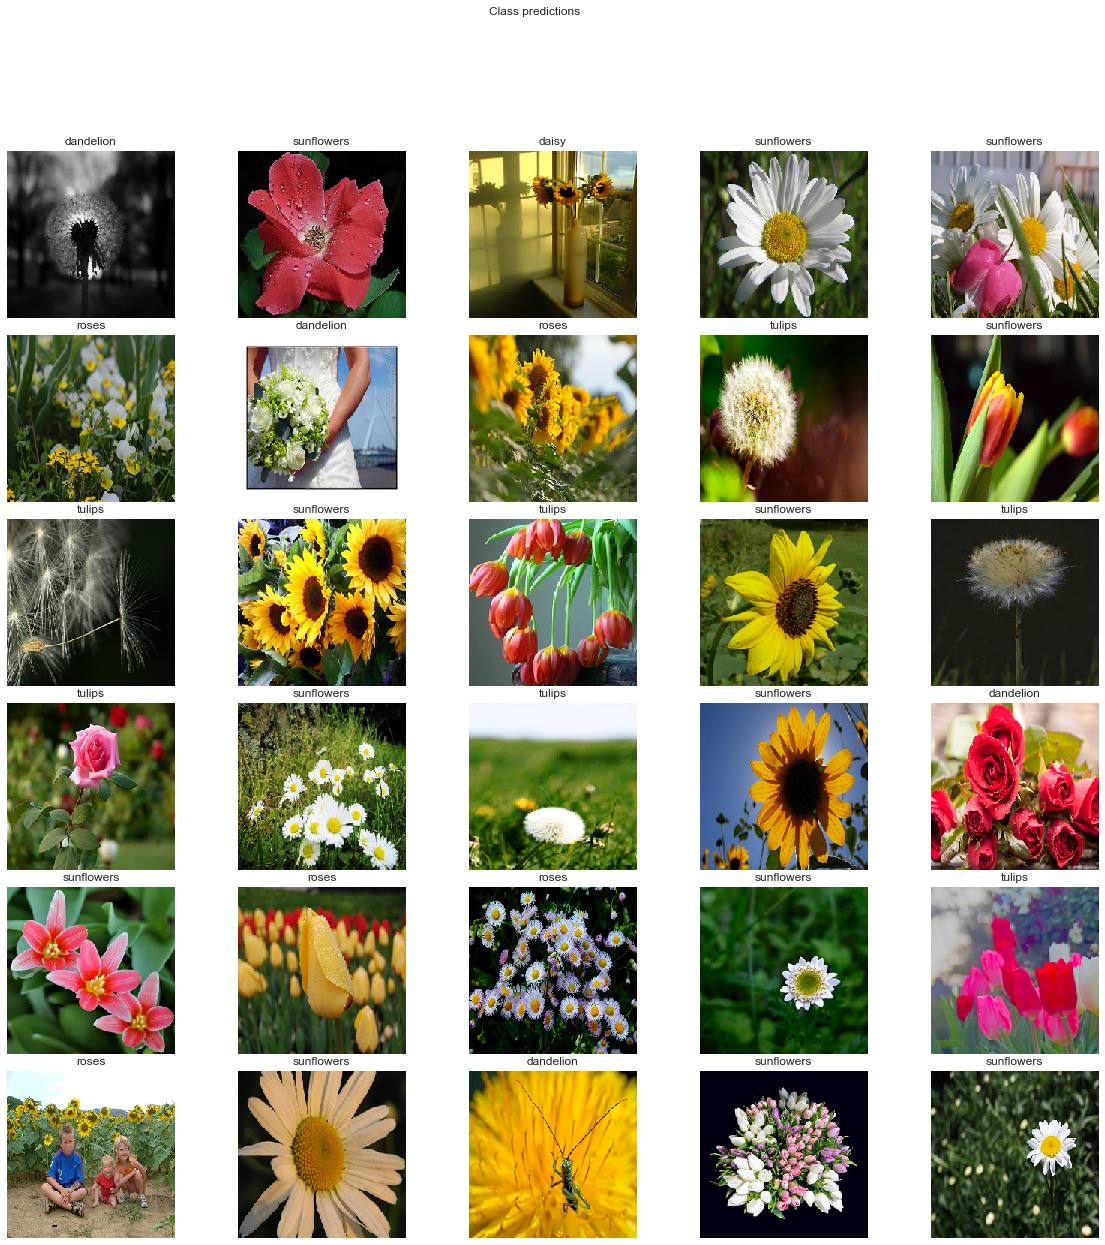

In [8]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.1)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(flower_x[n])
  plt.title(oob_preds[n])
  plt.axis('off')
  plt.suptitle("Class predictions")
plt.show()

### Do surgery on the net: chop off trained output layer, tack on new untrained `Dense` output layer (`C` neurons)

#### Load in MobileNetV2 without the classification layer (output layer)

In [9]:
model = tf.keras.applications.MobileNetV2(input_shape=input_nonbatch_shape,
                                               include_top=False,
                                               weights='imagenet')
model.trainable = False
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

#### Tack on new Dense layer with `C` neurons

- Remember to specify activation function

In [37]:
aug_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=C, activation='softmax')
])
aug_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 313605    
Total params: 2,571,589
Trainable params: 313,605
Non-trainable params: 2,257,984
_________________________________________________________________


#### Compile the net with adam, categorical_crossentropy loss (for softmax / one-hot coded classes)

In [38]:
# Compile model with adam optimizer, categorical_crossentropy, accuracy
# look at summary for number of trainable wts (should be output layer only)
aug_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
aug_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 313605    
Total params: 2,571,589
Trainable params: 313,605
Non-trainable params: 2,257,984
_________________________________________________________________


#### Evaluate accuracy with untrained classification (output) layer

In [39]:
loss, acc = aug_model.evaluate(flower_x[:100], flower_yh[:100], verbose=0)
print(f'Accuracy: {acc}, Loss: {loss}')

Accuracy: 0.1599999964237213, Loss: 2.2397789192199706


#### Train the output layer wts only on the flower data

In [13]:
hist = aug_model.fit(flower_x, flower_yh,
                     epochs=7,
                     verbose=2,
                     batch_size=32)

Train on 3670 samples
Epoch 1/7
3670/3670 - 110s - loss: 2.2745 - accuracy: 0.7567
Epoch 2/7
3670/3670 - 110s - loss: 0.9185 - accuracy: 0.9000
Epoch 3/7
3670/3670 - 109s - loss: 0.4646 - accuracy: 0.9425
Epoch 4/7
3670/3670 - 125s - loss: 0.4719 - accuracy: 0.9515
Epoch 5/7
3670/3670 - 116s - loss: 0.2701 - accuracy: 0.9698
Epoch 6/7
3670/3670 - 107s - loss: 0.3974 - accuracy: 0.9613
Epoch 7/7
3670/3670 - 103s - loss: 0.2595 - accuracy: 0.9719


#### Evaluate accuracy with trained classification (output) layer

In [14]:
loss, acc = aug_model.evaluate(flower_x[:100], flower_yh[:100], verbose=0)
print(f'Accuracy: {acc}, Loss: {loss}')

Accuracy: 0.8399999737739563, Loss: 2.024362425804138


#### Visualize predicted labels next to input images

In [35]:
probs = aug_model.predict(flower_x[:30])
preds = class_names[np.argmax(probs, axis=1)]

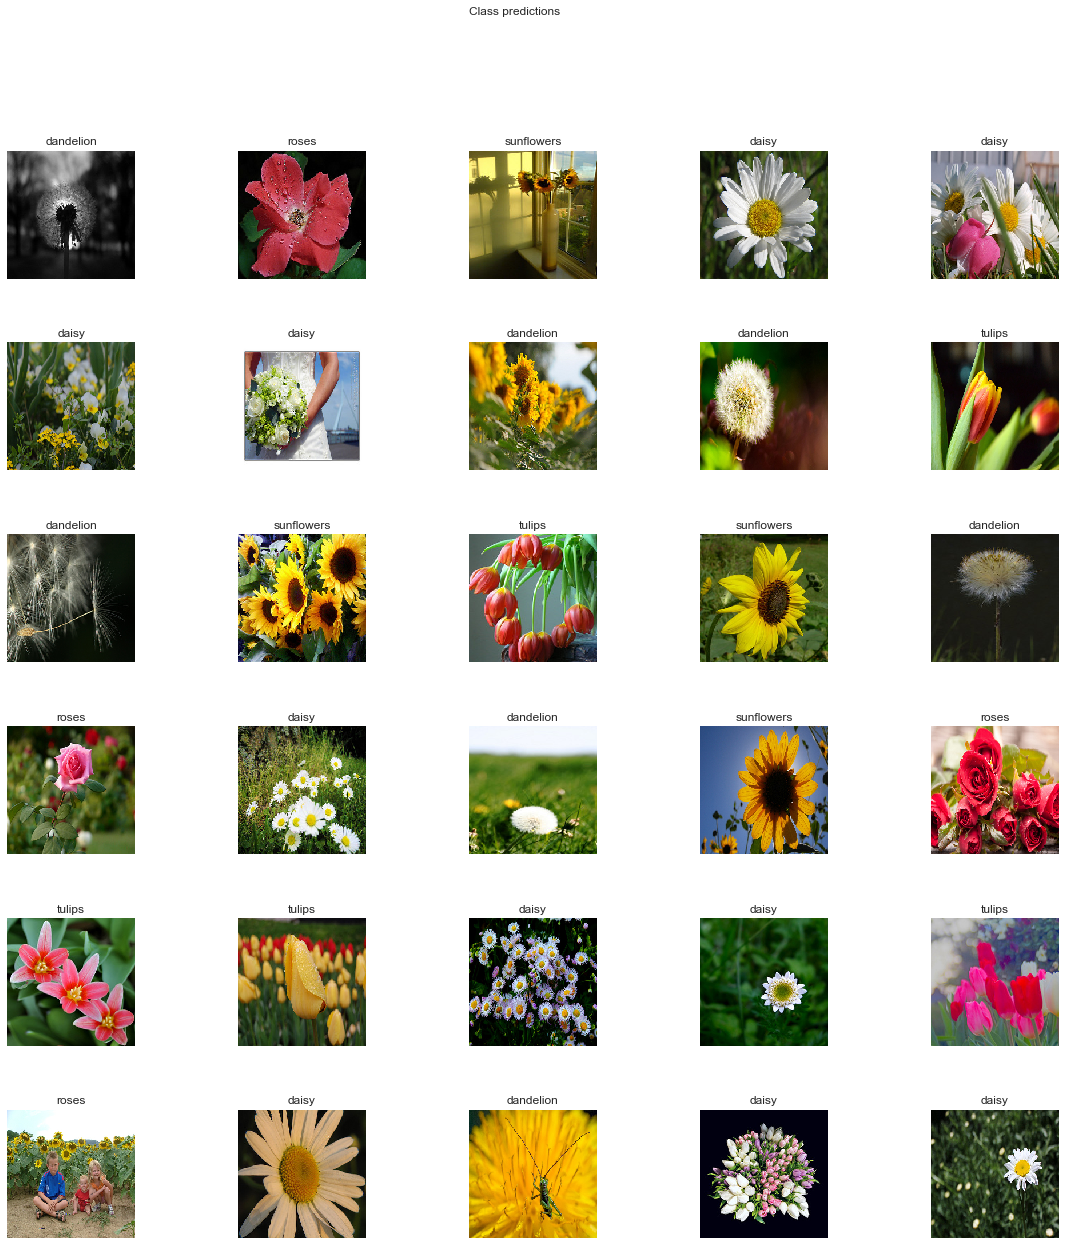

In [36]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(flower_x[n])
  plt.title(preds[n])
  plt.axis('off')
  plt.suptitle("Class predictions")
plt.show()

In [28]:
# predicted class probabilities — wow!
probs[:5]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [29]:
# actual class values
flower_y[:5]

array([3, 0, 1, 2, 2], dtype=int32)